## Problem Statement


We are working with a dataset on accident severity, and our goal is to build a machine learning model that can accurately predict the severity of accidents based on a range of different features. Our main objective is to identify the most important features for predicting accident severity and to develop a model that can generalize well to new data.

The dataset contains information about road traffic accidents in the UK, from the year 2005 to 2021. The columns in the dataset contain the following information:

- accident_index: Unique identifier for each accident
- accident_year: Year in which the accident occurred
- accident_reference: Reference number for the accident
- location_easting_osgr: Easting (X-coordinate) of accident location in British National Grid
- location_northing_osgr: Northing (Y-coordinate) of accident location in British National Grid
- longitude: Longitude of accident location
- latitude: Latitude of accident location
- police_force: Police force that attended the accident
- accident_severity: Severity of the accident, ranging from 1 (fatal) to 3 (slight)
- number_of_vehicles: Number of vehicles involved in the accident
- number_of_casualties: Number of casualties in the accident
- date: Date of the accident
- day_of_week: Day of the week on which the accident occurred
- time: Time of the accident
- local_authority_district: Local authority district in which the accident occurred
- local_authority_ons_district: ONS code for the local authority district in which the accident occurred
- local_authority_highway: Highway authority responsible for the road on which the accident occurred
- first_road_class: Class of the first road involved in the accident, ranging from 1 (motorway) to 6 (other)
- first_road_number: Number of the first road involved in the accident
- road_type: Type of road on which the accident occurred, ranging from 1 (motorway) to 6 (footpath or bridleway)
- speed_limit: Speed limit on the road on which the accident occurred
- junction_detail: Type of junction at which the accident occurred
- junction_control: Control of the junction at which the accident occurred
- second_road_class: Class of the second road involved in the accident, ranging from 0 (not at junction or within 20 metres) to 6 (other)
- second_road_number: Number of the second road involved in the accident
- pedestrian_crossing_human_control: Whether a pedestrian crossing with a human controller was present at the accident location
- pedestrian_crossing_physical_facilities: Whether a pedestrian crossing with physical facilities was present at the accident location
- light_conditions: Light conditions at the time of the accident
- weather_conditions: Weather conditions at the time of the accident
- road_surface_conditions: Road surface conditions at the time of the accident
- special_conditions_at_site: Whether any special conditions were present at the accident location
- carriageway_hazards: Whether any carriageway hazards were present at the accident location
- urban_or_rural_area: Whether the accident occurred in an urban or rural area
- did_police_officer_attend_scene_of_accident: Whether a police officer attended the scene of the accident
- trunk_road_flag: Whether the road on which the accident occurred is a trunk road
- lsoa_of_accident_location: Lower Super Output Area in which the accident occurred

This information can be used to understand the factors that contribute to road traffic accidents and to develop strategies to prevent such accidents in the future.





In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!unzip -q "/content/drive/MyDrive/code_files/Sri/road_acc_4/Data.zip"

In [4]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To tune model, get different metric scores, and split data
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score
)
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn import metrics

# To impute missing values
from sklearn.impute import SimpleImputer

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To do hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV



# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# To supress warnings
import warnings

warnings.filterwarnings("ignore")

In [5]:
data = pd.read_csv("/content/Data/Accidents-2021.csv")

In [6]:
data.head()

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
0,2021010000000.0,2021,10287148,521508.0,193079.0,-0.246102,51.623425,1,3,3,1,1/1/2021,6,2:05,-1,E09000003,E09000003,6,0,6,30,9,4,6,0,0,0,4,7,4,1,0,1,1,2,E01000263
1,2021010000000.0,2021,10287149,535379.0,180783.0,-0.050574,51.509767,1,2,2,3,1/1/2021,6,3:30,-1,E09000030,E09000030,3,1203,3,30,7,2,3,1204,0,5,4,1,1,0,0,1,1,2,E01004303
2,2021010000000.0,2021,10287151,529701.0,170398.0,-0.136152,51.417769,1,2,2,4,1/1/2021,6,4:07,-1,E09000022,E09000022,4,272,6,30,9,2,5,0,0,5,4,1,1,0,0,1,1,2,E01003146
3,2021010000000.0,2021,10287155,525312.0,178385.0,-0.196411,51.490536,1,1,1,1,1/1/2021,6,4:26,-1,E09000020,E09000020,3,3220,2,30,9,4,6,0,0,4,4,1,1,0,0,1,1,2,E01002847
4,2021010000000.0,2021,10287157,512144.0,171526.0,-0.388169,51.431649,1,3,4,1,1/1/2021,6,3:10,-1,E09000018,E09000018,5,0,6,20,3,4,6,0,0,0,4,1,1,0,0,1,1,2,E01002608


In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
accident_year,101087.0,2021.000000,0.000000,2021.000000,2021.000000,2021.000000,2021.000000,2.021000e+03
location_easting_osgr,101070.0,455370.590195,92901.603757,67564.000000,392252.500000,461832.500000,530038.000000,6.551400e+05
location_northing_osgr,101070.0,274267.396596,145053.875052,13898.000000,175175.250000,211641.500000,382389.500000,1.179892e+06
longitude,101070.0,-1.204951,1.357913,-7.486852,-2.116694,-1.087226,-0.127483,1.755955e+00
latitude,101070.0,52.355819,1.307057,49.980835,51.462397,51.789613,53.334320,6.050001e+01
police_force,101087.0,27.055833,24.235890,1.000000,4.000000,21.000000,44.000000,9.900000e+01
accident_severity,101087.0,2.760286,0.459800,1.000000,3.000000,3.000000,3.000000,3.000000e+00
number_of_vehicles,101087.0,1.844382,0.680355,1.000000,1.000000,2.000000,2.000000,1.300000e+01
number_of_casualties,101087.0,1.268304,0.674544,1.000000,1.000000,1.000000,1.000000,2.200000e+01
day_of_week,101087.0,4.138692,1.941061,1.000000,2.000000,4.000000,6.000000,7.000000e+00


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101087 entries, 0 to 101086
Data columns (total 36 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   accident_index                               101087 non-null  object 
 1   accident_year                                101087 non-null  int64  
 2   accident_reference                           101087 non-null  object 
 3   location_easting_osgr                        101070 non-null  float64
 4   location_northing_osgr                       101070 non-null  float64
 5   longitude                                    101070 non-null  float64
 6   latitude                                     101070 non-null  float64
 7   police_force                                 101087 non-null  int64  
 8   accident_severity                            101087 non-null  int64  
 9   number_of_vehicles                           101087 non-nul

In [9]:
# Checking for missing values in the data
data.isnull().sum()

accident_index                                  0
accident_year                                   0
accident_reference                              0
location_easting_osgr                          17
location_northing_osgr                         17
longitude                                      17
latitude                                       17
police_force                                    0
accident_severity                               0
number_of_vehicles                              0
number_of_casualties                            0
date                                            0
day_of_week                                     0
time                                            0
local_authority_district                        0
local_authority_ons_district                    0
local_authority_highway                         0
first_road_class                                0
first_road_number                               0
road_type                                       0


In [31]:
data.nunique()

police_force                                     44
accident_severity                                 3
number_of_vehicles                               13
number_of_casualties                             12
day_of_week                                       7
local_authority_district                         15
first_road_class                                  6
first_road_number                              3099
road_type                                         6
speed_limit                                       6
junction_detail                                  11
junction_control                                  6
second_road_class                                 8
second_road_number                             2374
pedestrian_crossing_human_control                 5
pedestrian_crossing_physical_facilities           8
light_conditions                                  6
weather_conditions                               10
road_surface_conditions                           7
special_cond

In [12]:
# deleting columns which are mostly unqiue or has a unique category
data = data.drop(['accident_index','accident_year','accident_reference','location_easting_osgr',
                  'location_northing_osgr','longitude','latitude','date','time','lsoa_of_accident_location',
                  'local_authority_ons_district','local_authority_highway'], axis = 1)

In [17]:
data.duplicated().sum()

0

In [16]:
# dropping duplicaates
data = data.drop_duplicates()

In [21]:
# converting the datatypes of categoraical variables to category
data['police_force'] = data['police_force'].astype('category')
data['day_of_week'] = data['day_of_week'].astype('category')
data['accident_severity'] = data['accident_severity'].astype('category')
data['first_road_class'] = data['first_road_class'].astype('category')
data['local_authority_district'] = data['local_authority_district'].astype('category')
data['second_road_class'] = data['second_road_class'].astype('category')

data['pedestrian_crossing_human_control'] = data['pedestrian_crossing_human_control'].astype('category')
data['pedestrian_crossing_physical_facilities'] = data['pedestrian_crossing_physical_facilities'].astype('category')
data['light_conditions'] = data['light_conditions'].astype('category')
data['weather_conditions'] = data['weather_conditions'].astype('category')
data['special_conditions_at_site'] = data['special_conditions_at_site'].astype('category')
data['carriageway_hazards'] = data['carriageway_hazards'].astype('category')
data['did_police_officer_attend_scene_of_accident'] = data['did_police_officer_attend_scene_of_accident'].astype('category')

data['trunk_road_flag'] = data['trunk_road_flag'].astype('category')
data['road_surface_conditions'] = data['road_surface_conditions'].astype('category')
data['urban_or_rural_area'] = data['urban_or_rural_area'].astype('category')


In [22]:
num_cols = ['number_of_vehicles','number_of_casualties','first_road_number','speed_limit', 'junction_detail', 'junction_control']
cat_cols = ['police_force','day_of_week','accident_severity','first_road_class','local_authority_district',
            'second_road_class','pedestrian_crossing_human_control','pedestrian_crossing_physical_facilities','light_conditions',
            'weather_conditions','special_conditions_at_site','carriageway_hazards','did_police_officer_attend_scene_of_accident',
            'road_surface_conditions','trunk_road_flag','urban_or_rural_area']

In [24]:
# let's check for missing values in the data
round(data.isnull().sum() / data.isnull().count() * 100, 2)

police_force                                   0.0
accident_severity                              0.0
number_of_vehicles                             0.0
number_of_casualties                           0.0
day_of_week                                    0.0
local_authority_district                       0.0
first_road_class                               0.0
first_road_number                              0.0
road_type                                      0.0
speed_limit                                    0.0
junction_detail                                0.0
junction_control                               0.0
second_road_class                              0.0
second_road_number                             0.0
pedestrian_crossing_human_control              0.0
pedestrian_crossing_physical_facilities        0.0
light_conditions                               0.0
weather_conditions                             0.0
road_surface_conditions                        0.0
special_conditions_at_site     

In [25]:
# checking for value_counts in each nominal feature
columns = cat_cols
for i in columns:
    print("Unique values in", i, "are :")
    print(data[i].value_counts())
    print("*" * 50)

Unique values in police_force are :
1     21738
20     4094
99     3749
13     3532
46     3423
47     3006
6      2815
44     2808
43     2770
42     2601
4      2592
50     2570
45     2387
52     2168
14     1942
5      1804
31     1750
30     1706
10     1706
16     1683
7      1546
22     1525
41     1517
32     1490
36     1315
35     1282
12     1251
55     1232
54     1223
33     1086
40     1038
37     1017
34     1013
63      947
62      902
23      832
21      806
60      766
53      737
3       724
11      623
17      602
61      590
48      145
Name: police_force, dtype: int64
**************************************************
Unique values in day_of_week are :
6    15945
5    14149
4    13974
3    13680
7    13256
2    13117
1    10932
Name: day_of_week, dtype: int64
**************************************************
Unique values in accident_severity are :
3    73048
2    20533
1     1472
Name: accident_severity, dtype: int64
*********************************************

In [26]:
# Checking summary statistics
data[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
number_of_vehicles,95053.0,1.850462,0.690398,1.0,1.0,2.0,2.0,13.0
number_of_casualties,95053.0,1.282737,0.690961,1.0,1.0,1.0,1.0,22.0
first_road_number,95053.0,836.641505,1617.922890,0.0,0.0,46.0,595.0,9480.0
speed_limit,95053.0,36.287334,14.262362,20.0,30.0,30.0,40.0,70.0
junction_detail,95053.0,4.464825,14.038640,-1.0,0.0,2.0,3.0,99.0
junction_control,95053.0,1.794167,2.519444,-1.0,-1.0,2.0,4.0,9.0


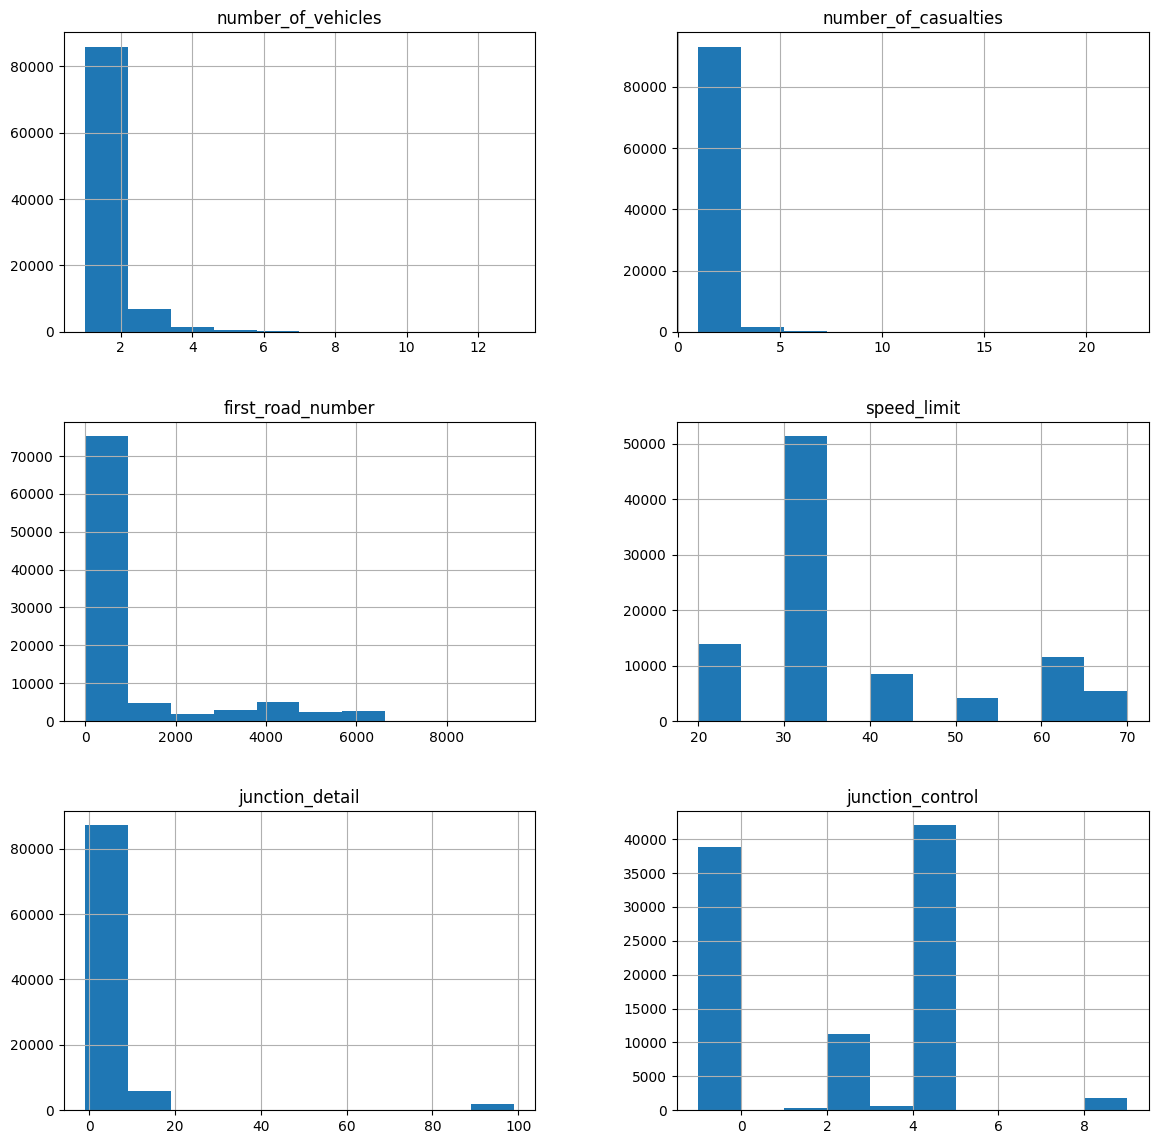

In [28]:
# Creating histograms
data[num_cols].hist(figsize = (14, 14))

plt.show()

In [30]:
data.head()

,police_force,accident_severity,number_of_vehicles,number_of_casualties,day_of_week,local_authority_district,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag
0,1,3,3,1,6,-1,6,0,6,30,9,4,6,0,0,0,4,7,4,1,0,1,1,2
1,1,2,2,3,6,-1,3,1203,3,30,7,2,3,1204,0,5,4,1,1,0,0,1,1,2
2,1,2,2,4,6,-1,4,272,6,30,9,2,5,0,0,5,4,1,1,0,0,1,1,2
3,1,1,1,1,6,-1,3,3220,2,30,9,4,6,0,0,4,4,1,1,0,0,1,1,2
4,1,3,4,1,6,-1,5,0,6,20,3,4,6,0,0,0,4,1,1,0,0,1,1,2


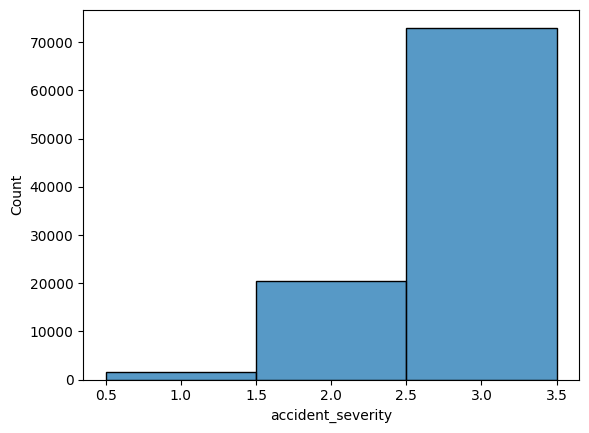

In [33]:

# Distribution of target variable
sns.histplot(data["accident_severity"], kde=False)
plt.show()


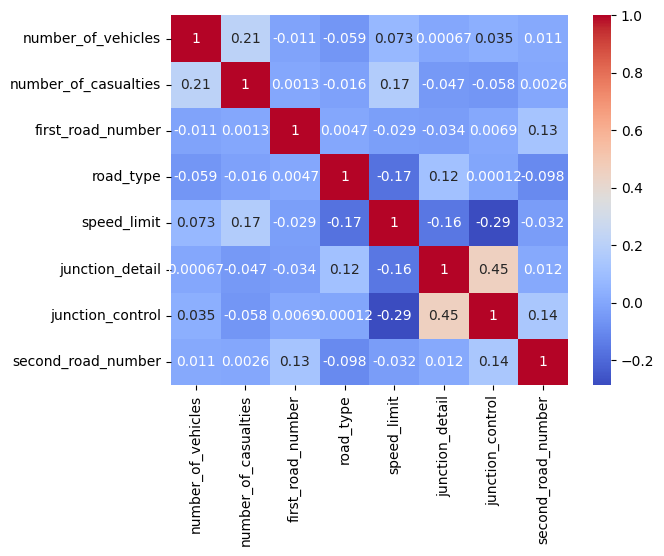

In [35]:

# Correlation analysis
corr = data.corr()
sns.heatmap(corr, cmap="coolwarm", annot=True)
plt.show()


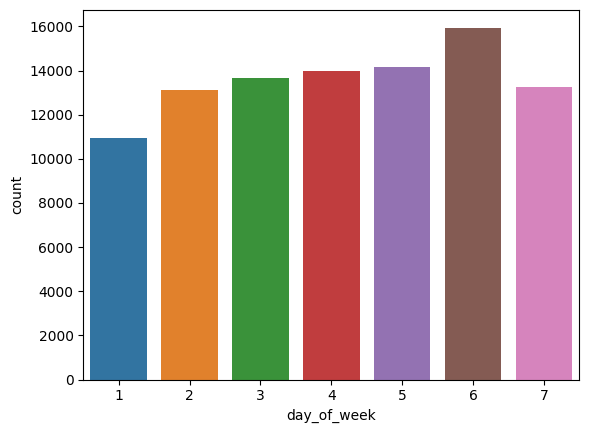

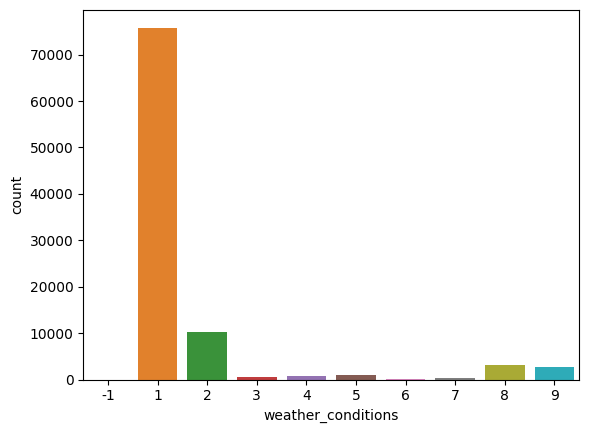

In [36]:

# Bar chart for categorical variables
sns.countplot(x="day_of_week", data=data)
plt.show()

sns.countplot(x="weather_conditions", data=data)
plt.show()

In [38]:
for i in cat_cols:
    print(data[i].value_counts(normalize = True))
    
    print('*' * 40)

1     0.228693
20    0.043071
99    0.039441
13    0.037158
46    0.036011
47    0.031624
6     0.029615
44    0.029541
43    0.029142
42    0.027364
4     0.027269
50    0.027038
45    0.025112
52    0.022808
14    0.020431
5     0.018979
31    0.018411
30    0.017948
10    0.017948
16    0.017706
7     0.016265
22    0.016044
41    0.015960
32    0.015675
36    0.013834
35    0.013487
12    0.013161
55    0.012961
54    0.012867
33    0.011425
40    0.010920
37    0.010699
34    0.010657
63    0.009963
62    0.009489
23    0.008753
21    0.008479
60    0.008059
53    0.007754
3     0.007617
11    0.006554
17    0.006333
61    0.006207
48    0.001525
Name: police_force, dtype: float64
****************************************
6    0.167749
5    0.148854
4    0.147013
3    0.143920
7    0.139459
2    0.137997
1    0.115010
Name: day_of_week, dtype: float64
****************************************
3    0.768498
2    0.216016
1    0.015486
Name: accident_severity, dtype: float64
*********

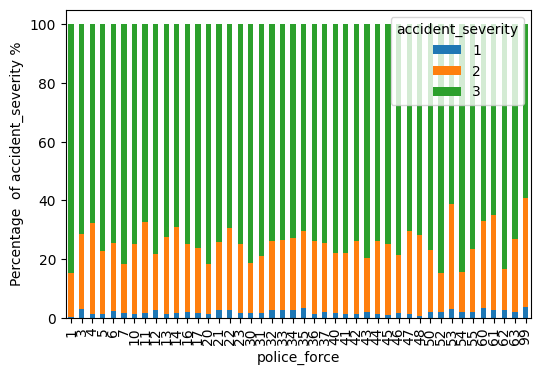

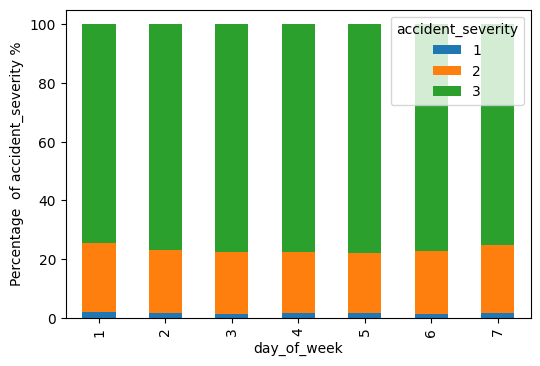

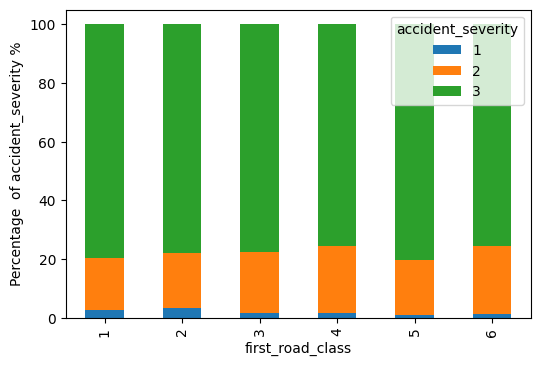

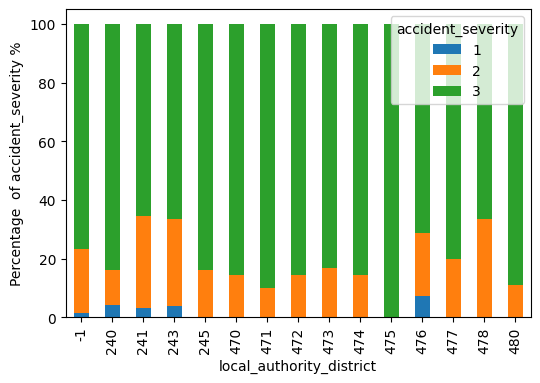

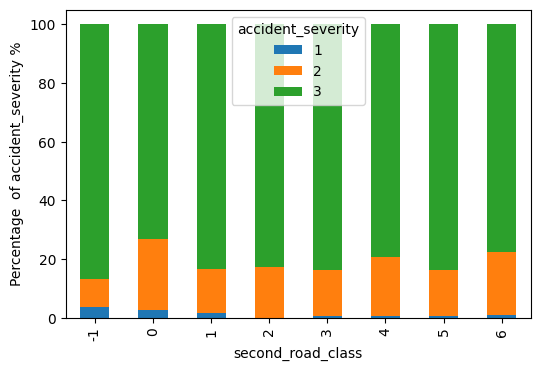

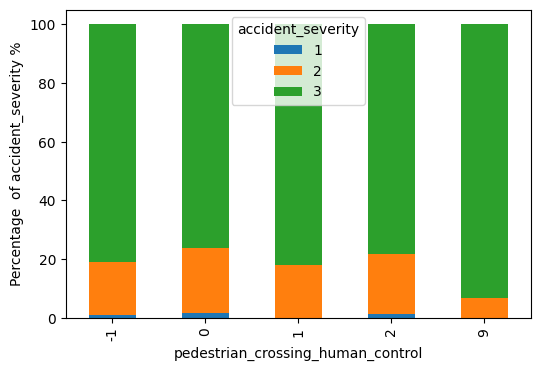

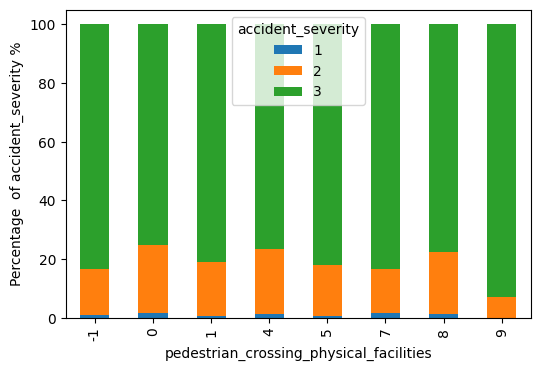

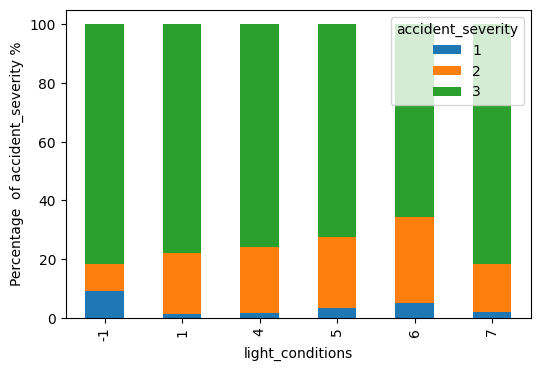

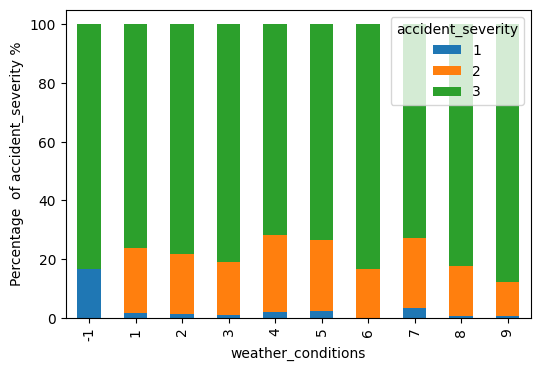

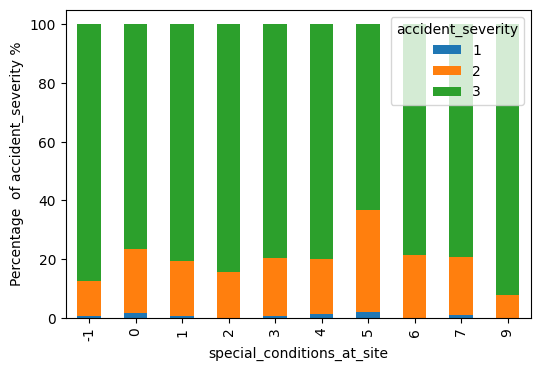

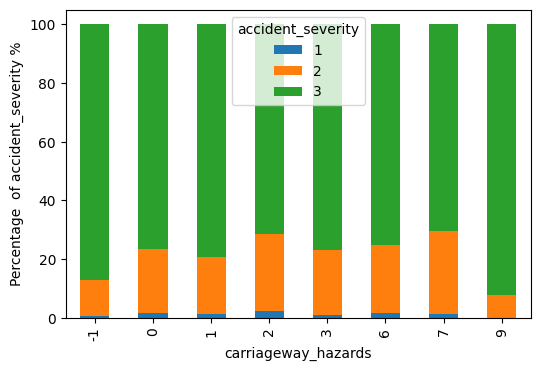

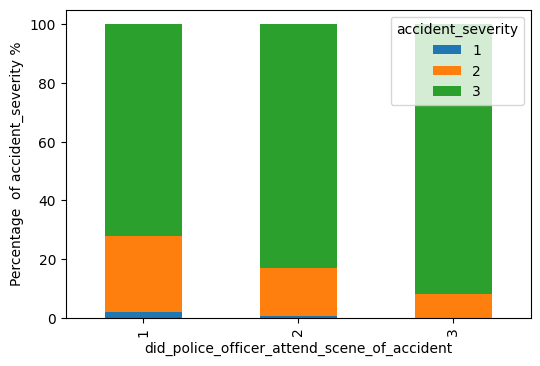

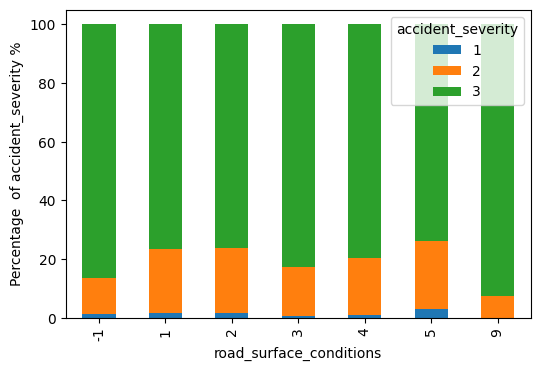

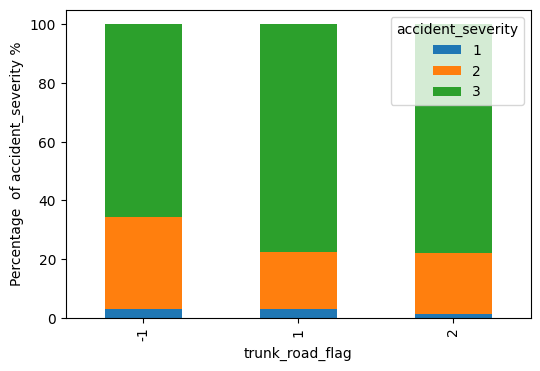

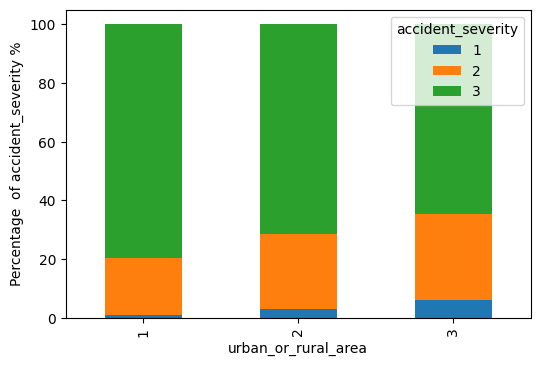

In [39]:
for i in cat_cols:
    if i != 'accident_severity':
        (pd.crosstab(data[i], data['accident_severity'], normalize = 'index')*100).plot(kind = 'bar', figsize = (6, 4), stacked = True)
        plt.ylabel('Percentage  of accident_severity %')

In [41]:
data[num_cols].corr()

,number_of_vehicles,number_of_casualties,first_road_number,speed_limit,junction_detail,junction_control
number_of_vehicles,1.000000,0.212728,-0.010713,0.073207,0.000665,0.034882
number_of_casualties,0.212728,1.000000,0.001285,0.173840,-0.046740,-0.057680
first_road_number,-0.010713,0.001285,1.000000,-0.029029,-0.033807,0.006942
speed_limit,0.073207,0.173840,-0.029029,1.000000,-0.155483,-0.285929
junction_detail,0.000665,-0.046740,-0.033807,-0.155483,1.000000,0.454381
junction_control,0.034882,-0.057680,0.006942,-0.285929,0.454381,1.000000


<Axes: >

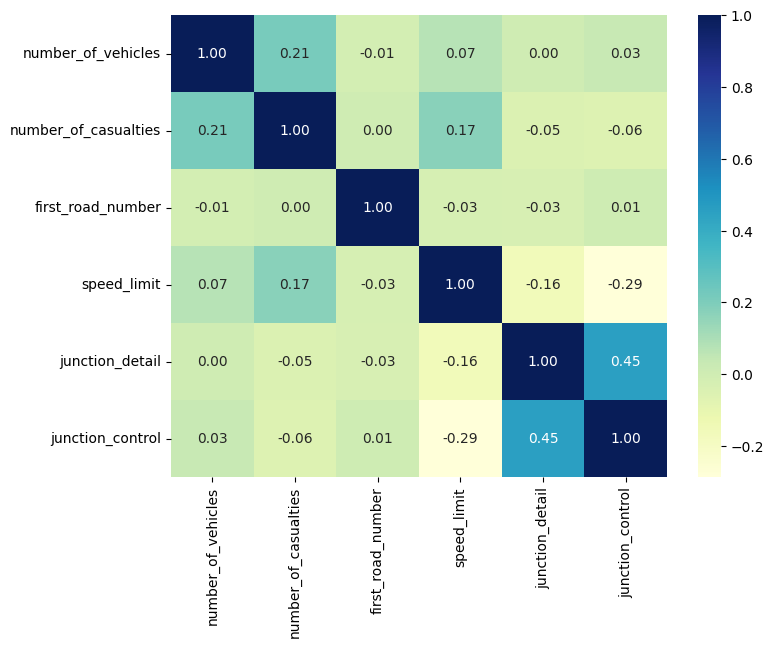

In [40]:
# Plotting the correlation between numerical variables
plt.figure(figsize = (8, 6))

sns.heatmap(data[num_cols].corr(), annot = True, fmt = '0.2f', cmap = 'YlGnBu')

In [43]:
# Function to plot a boxplot and a histogram along the same scale

def histogram_boxplot(data, feature, figsize = (10, 7), kde = False, bins = None):
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows = 2,     
        sharex = True, 
        gridspec_kw = {"height_ratios": (0.25, 0.75)},
        figsize = figsize,
    )                   
    sns.boxplot(
        data = data, x = feature, ax = ax_box2, showmeans = True, color = "violet"
    )                  
    sns.histplot(
        data = data, x = feature, kde = kde, ax = ax_hist2, bins = bins, palette = "winter"
    ) if bins else sns.histplot(
        data = data, x = feature, kde = kde, ax = ax_hist2
    )           
    ax_hist2.axvline(
        data[feature].mean(), color = "green", linestyle = "--"
    )                 
    ax_hist2.axvline(
        data[feature].median(), color = "black", linestyle = "-"
    )                   

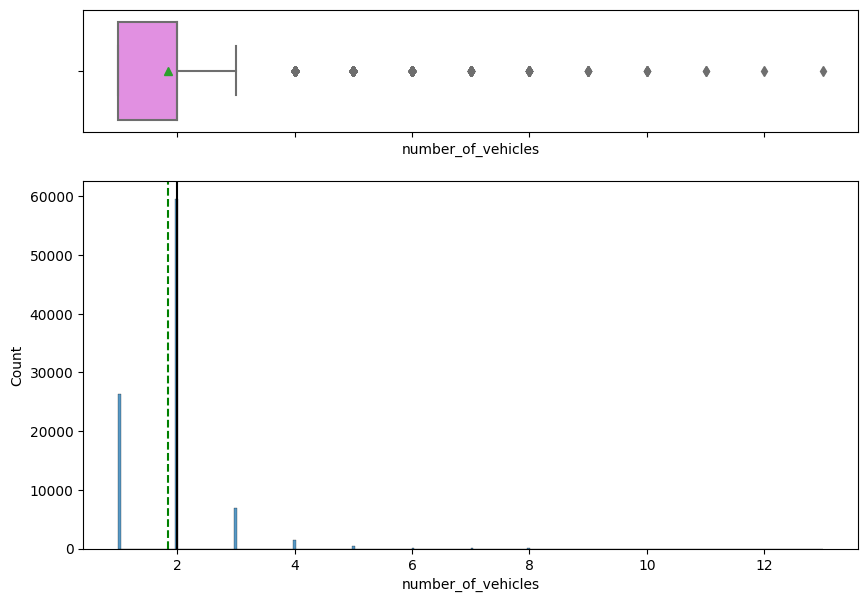

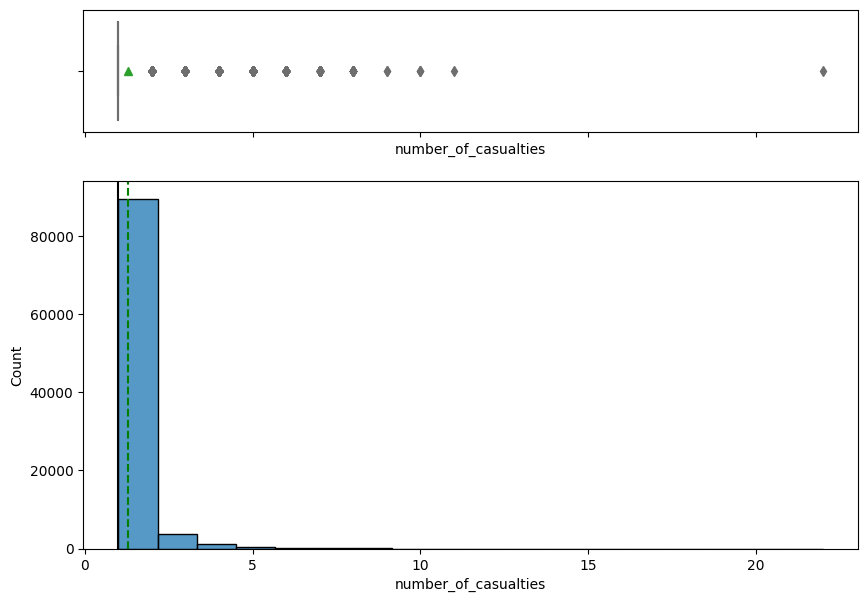

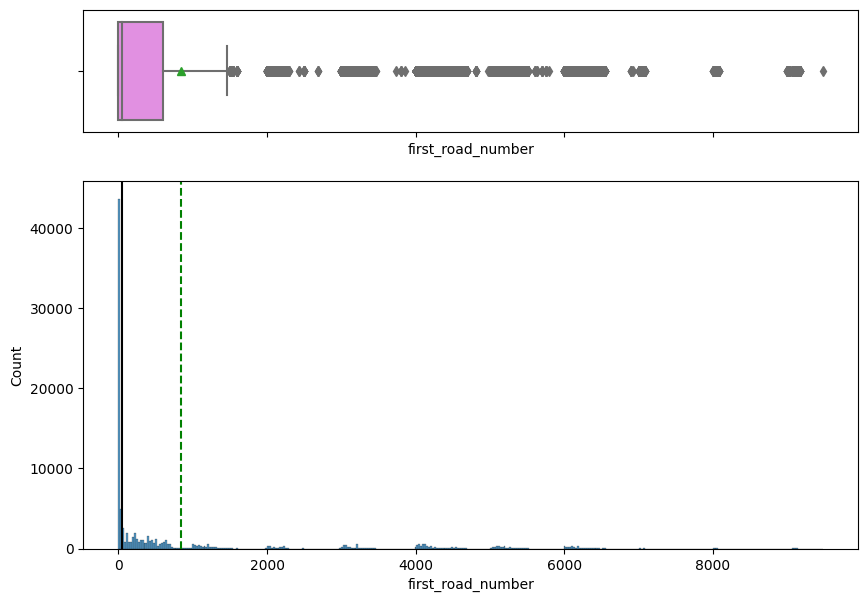

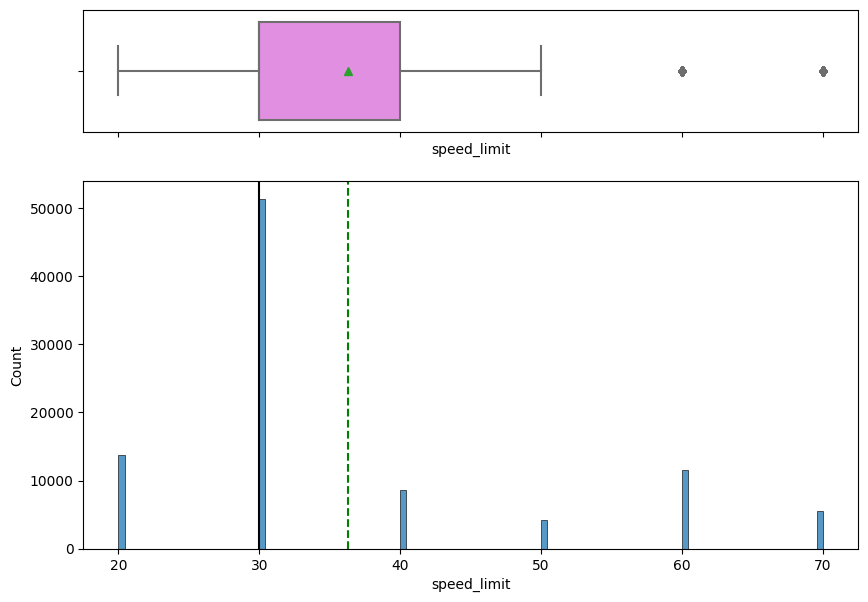

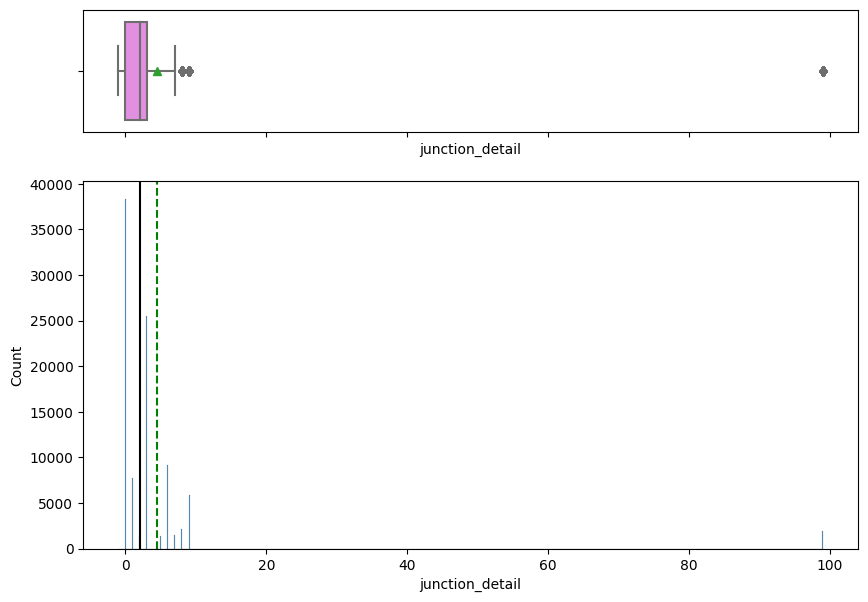

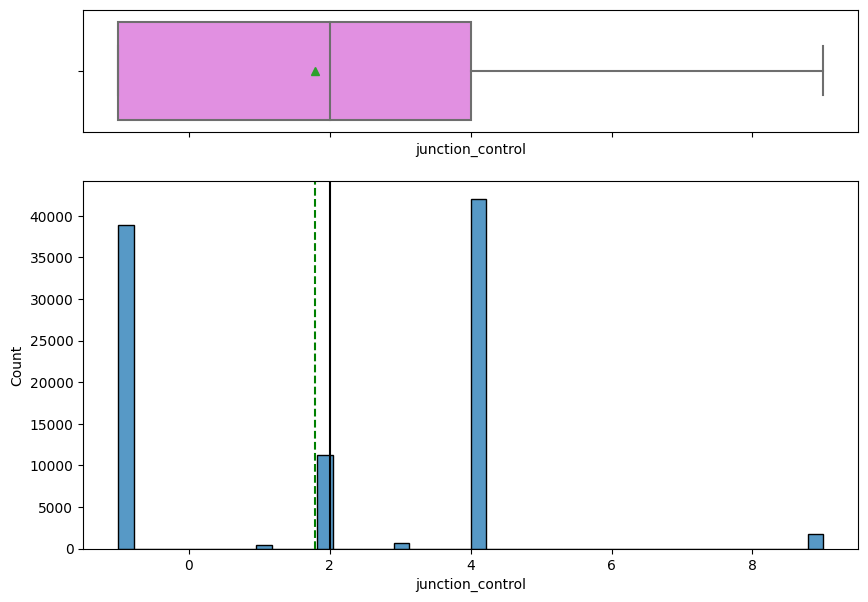

In [44]:
for i in num_cols:
  histogram_boxplot(data, i)

In [45]:
# Function to create labeled barplots

def labeled_barplot(data, feature, perc = False, n = None):


    total = len(data[feature])             
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize = (count + 1, 5))
    else:
        plt.figure(figsize = (n + 1, 5))

    plt.xticks(rotation = 90, fontsize = 15)
    ax = sns.countplot(
        data = data,
        x = feature,
        palette = "Paired",
        order = data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )                               
        else:
            label = p.get_height()         

        x = p.get_x() + p.get_width() / 2  
        y = p.get_height()                 

        ax.annotate(
            label,
            (x, y),
            ha = "center",
            va = "center",
            size = 12,
            xytext = (0, 5),
            textcoords = "offset points",
        )                                 

    plt.show()                       

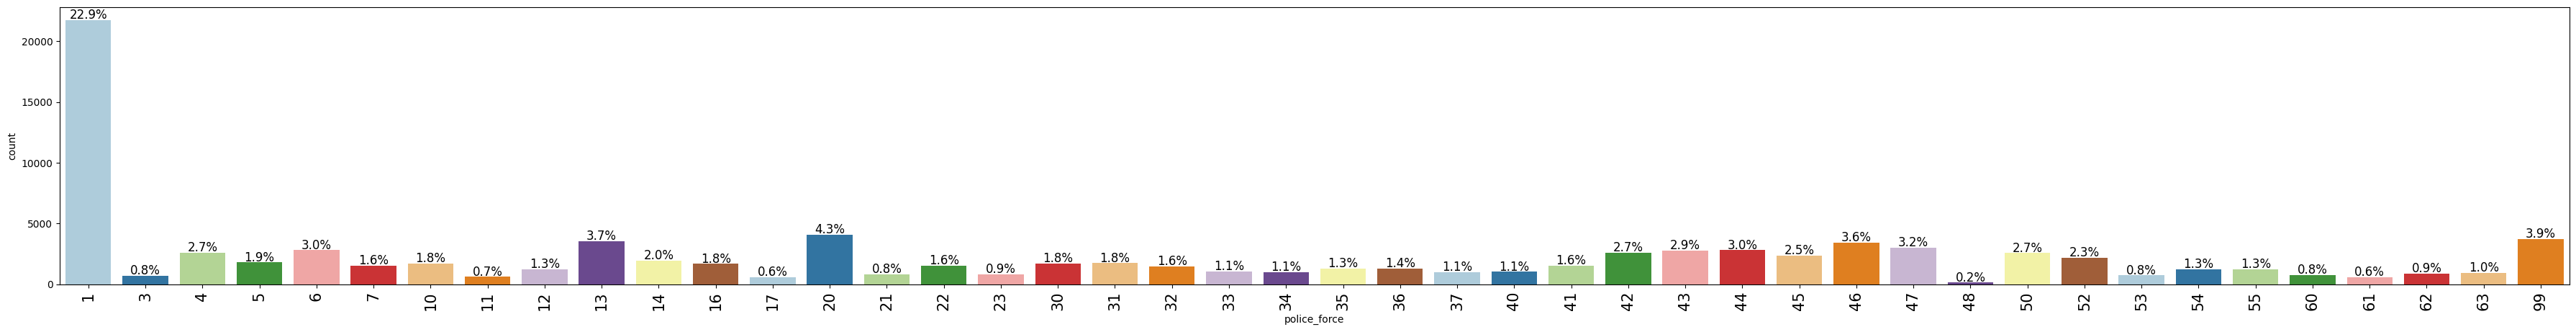

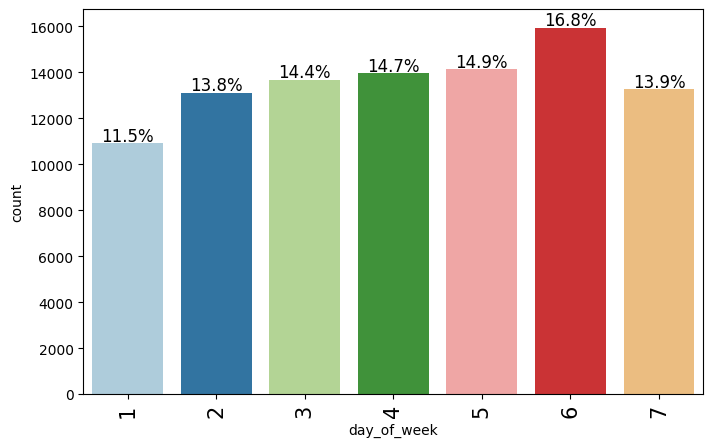

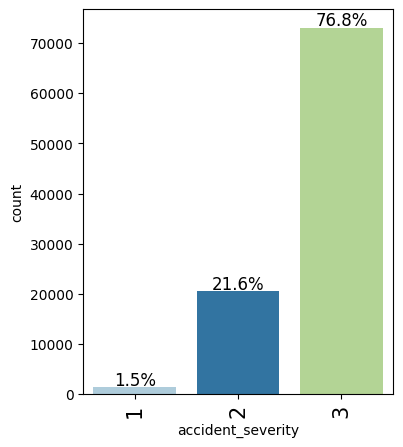

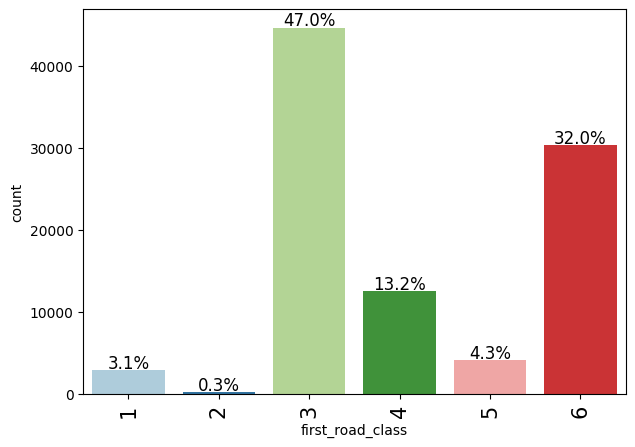

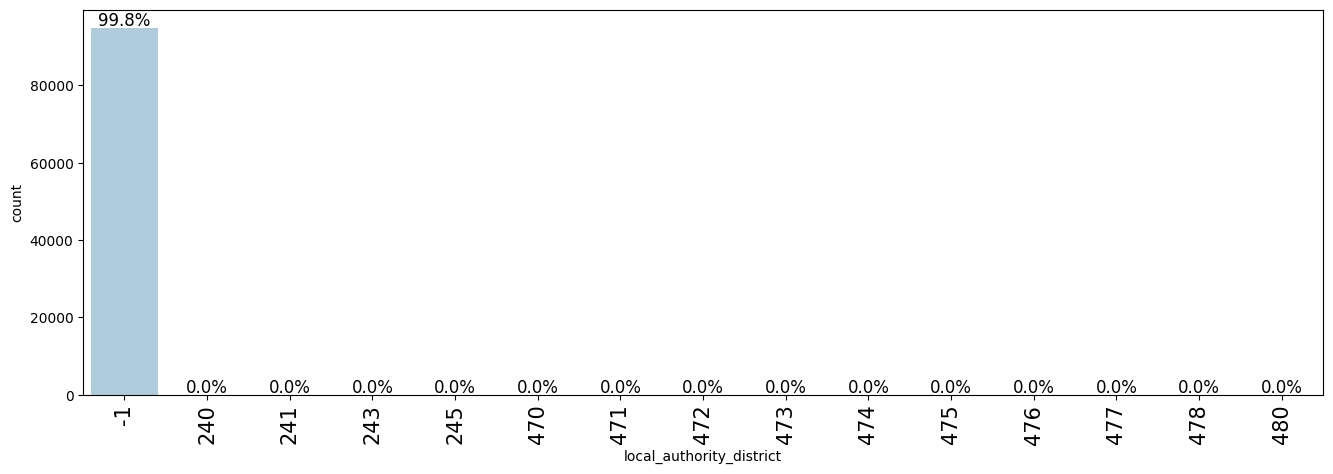

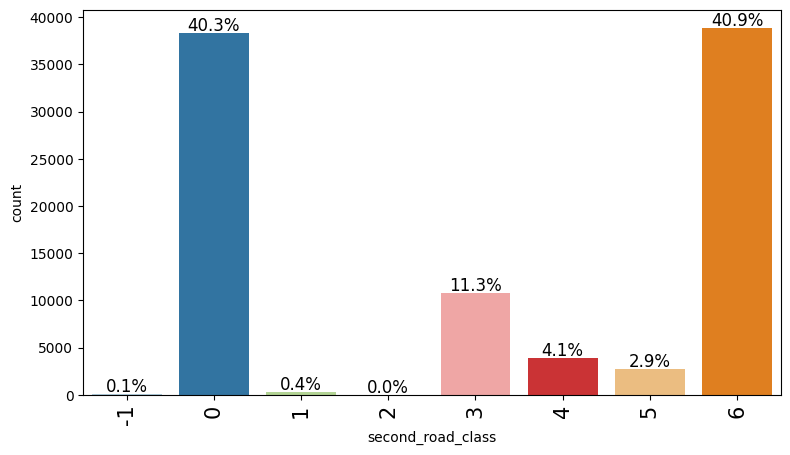

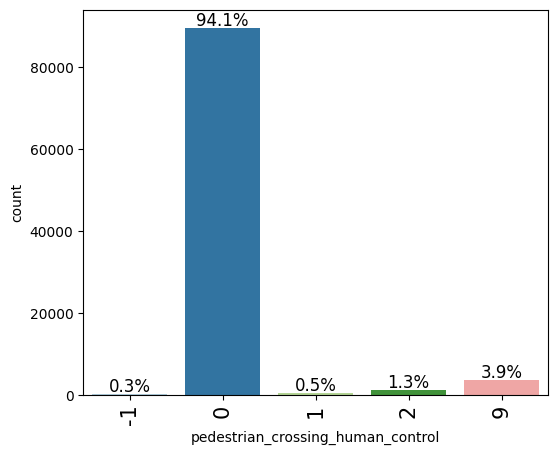

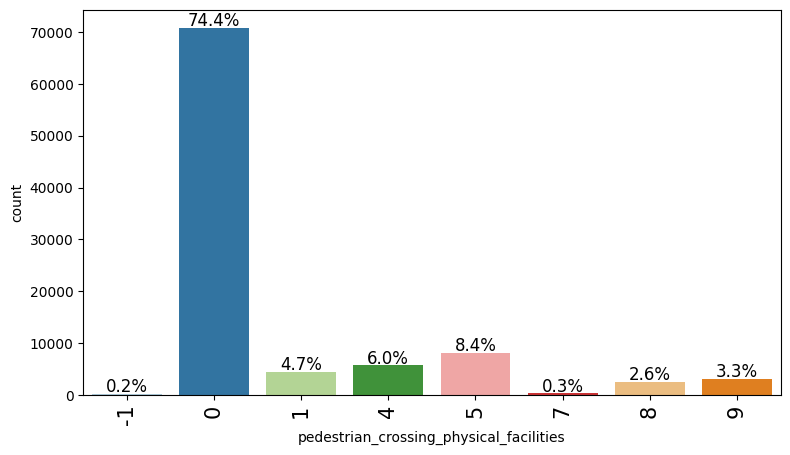

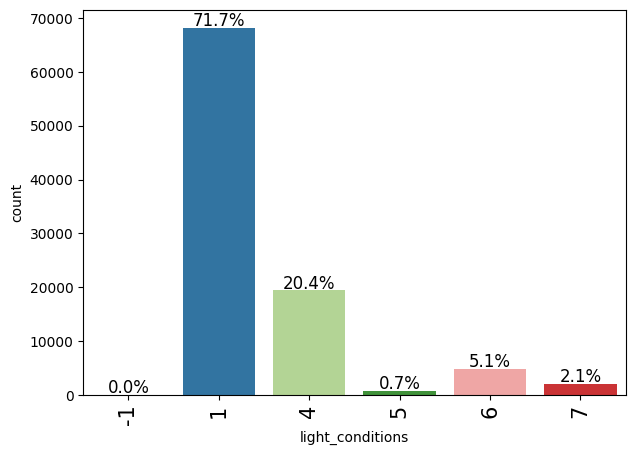

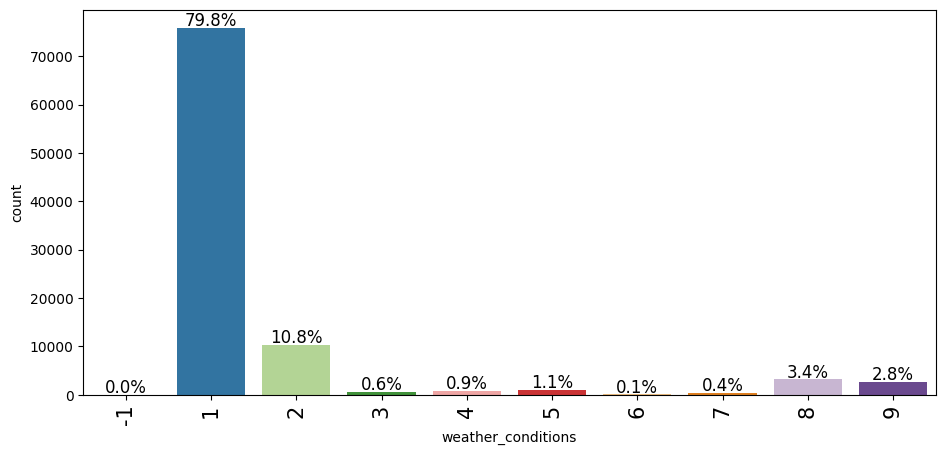

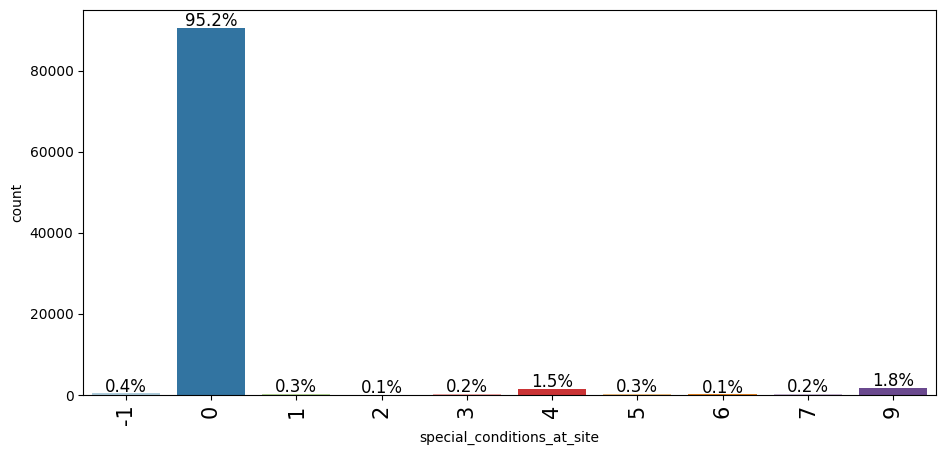

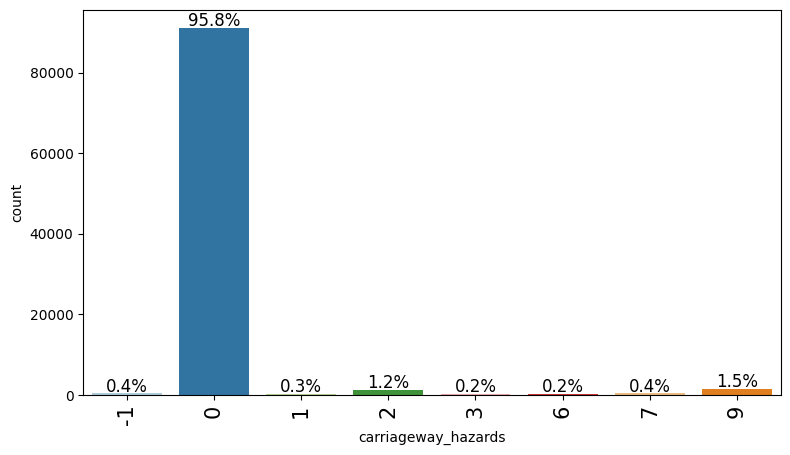

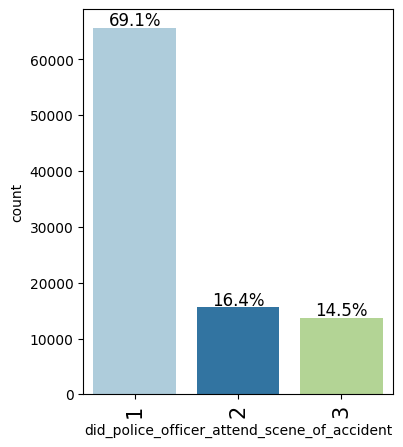

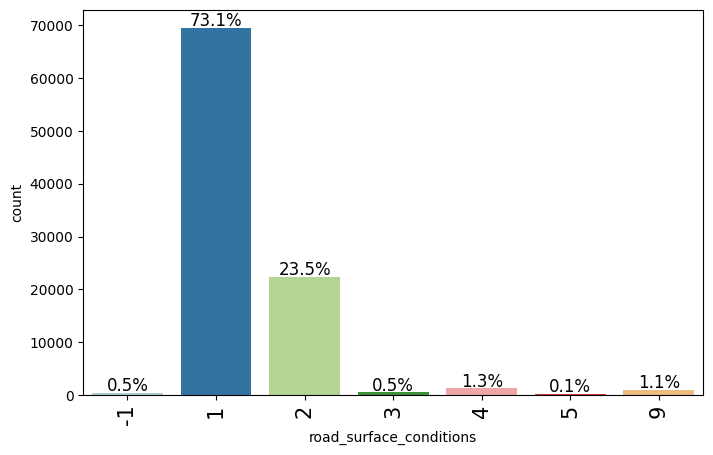

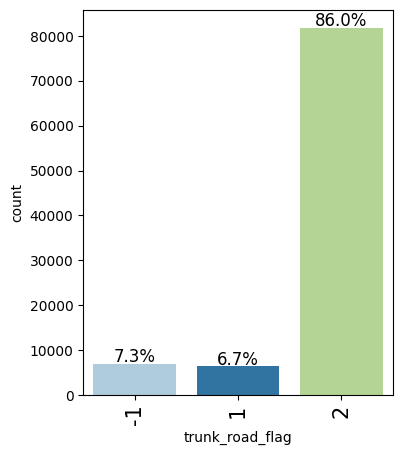

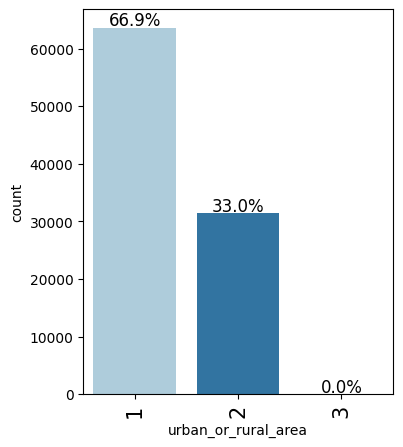

In [46]:
for i in cat_cols:
  labeled_barplot(data, i, perc = True)

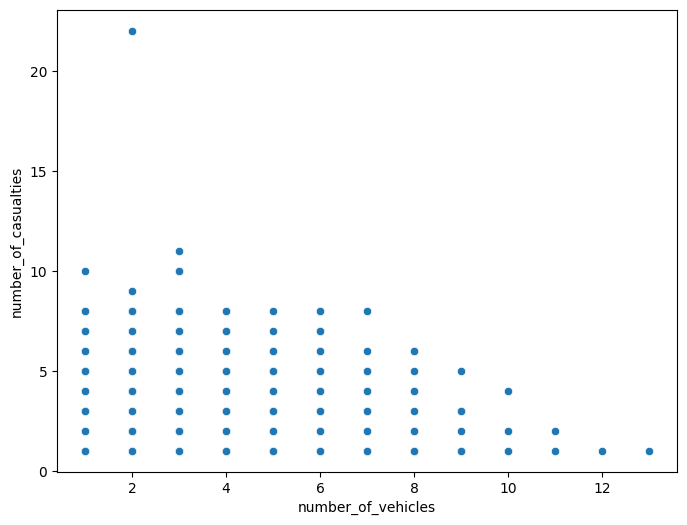

In [48]:
plt.figure(figsize = [8, 6])
sns.scatterplot(x = data.number_of_vehicles, y = data.number_of_casualties)
plt.show()

In [47]:
data.head()

,police_force,accident_severity,number_of_vehicles,number_of_casualties,day_of_week,local_authority_district,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag
0,1,3,3,1,6,-1,6,0,6,30,9,4,6,0,0,0,4,7,4,1,0,1,1,2
1,1,2,2,3,6,-1,3,1203,3,30,7,2,3,1204,0,5,4,1,1,0,0,1,1,2
2,1,2,2,4,6,-1,4,272,6,30,9,2,5,0,0,5,4,1,1,0,0,1,1,2
3,1,1,1,1,6,-1,3,3220,2,30,9,4,6,0,0,4,4,1,1,0,0,1,1,2
4,1,3,4,1,6,-1,5,0,6,20,3,4,6,0,0,0,4,1,1,0,0,1,1,2


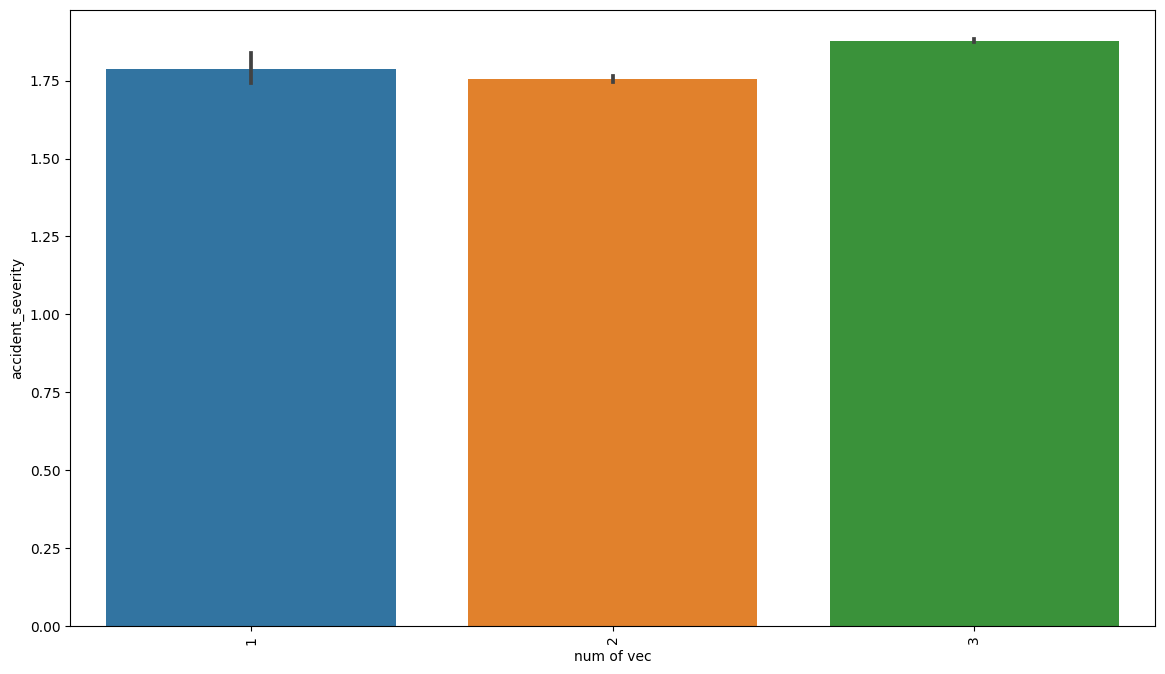

In [50]:
df_revenue1 = data.groupby(["number_of_vehicles"], as_index = False)[
    "accident_severity"
].sum()
plt.figure(figsize = [14, 8])
plt.xticks(rotation = 90)
a = sns.barplot(x = data.accident_severity, y = data.number_of_vehicles)
a.set_xlabel("num of vec")
a.set_ylabel("accident_severity")
plt.show()

In [54]:
# Creating the list of columns for which we need to create the dummy variables
to_get_dummies_for = ['police_force',
 'day_of_week',
 'first_road_class',
 'local_authority_district',
 'second_road_class',
 'pedestrian_crossing_human_control',
 'pedestrian_crossing_physical_facilities',
 'light_conditions',
 'weather_conditions',
 'special_conditions_at_site',
 'carriageway_hazards',
 'did_police_officer_attend_scene_of_accident',
 'road_surface_conditions',
 'trunk_road_flag',
 'urban_or_rural_area']

# Creating dummy variables
data = pd.get_dummies(data = data, columns = to_get_dummies_for, drop_first = True)      



In [56]:
# Separating the target variable and other variables
X = data.drop(columns = ['accident_severity'])
y = data.accident_severity

In [57]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1, stratify = y)

<b> Model Building

In [58]:
# reference for function is used fro google.
def model_performance_classification_sklearn(model, predictors, target):

    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  
    recall = recall_score(target, pred, average = "weighted") 
    precision = precision_score(target, pred, average = 'weighted')  
    f1 = f1_score(target, pred, average = 'weighted')  

    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

<b> Training models on original data

In [65]:
models = []  

models.append(("Logistic regression", LogisticRegression(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))


print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train, y_train)
    scores_train = recall_score(y_train, model.predict(X_train), average = "weighted")
    print("{}: {}".format(name, scores_train))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores_val = recall_score(y_test, model.predict(X_test), average = "weighted")
    print("{}: {}".format(name, scores_val))


Training Performance:

Logistic regression: 0.7685047417226506
dtree: 0.9869546267490269
Random forest: 0.9869395975171709

Validation Performance:

Logistic regression: 0.7684808528545378
dtree: 0.6419553934633189
Random forest: 0.7416888764202553


- The training performance of the decision tree and random forest models is very high, with accuracy scores of 0.9869 and 0.9869 respectively. This indicates that these models are likely overfitting the training data, as they are performing almost perfectly on the training set but not as well on the validation set.
- In contrast, the training performance of the logistic regression model is lower, with an accuracy score of 0.7685. This suggests that the logistic regression model may be less prone to overfitting, and may be a more robust model in this case.
The validation performance of the logistic regression model is similar to its training performance, with an accuracy score of 0.7685. This suggests that the model is likely performing consistently across both the training and validation sets, and may be a good candidate for deployment in practice.
- The validation performance of the decision tree model is much lower than its training performance, with an accuracy score of 0.6420. This indicates that the model is overfitting the training data, and is not generalizing well to new data.
- The validation performance of the random forest model is also lower than its training performance, but not as much as the decision tree model. Its accuracy score on the validation set is 0.7417, which is still a relatively good performance, but may indicate some overfitting.

In [63]:
print("Before Oversampling,'1': {}".format(sum(y_train == 1)))
print("Before Oversampling,'2': {} ".format(sum(y_train == 2)))
print("Before Oversampling,'3': {} ".format(sum(y_train == 3)))

Before Oversampling,'1': 1030
Before Oversampling,'2': 14373 
Before Oversampling,'3': 51134 


In [64]:
sm = SMOTE(
    sampling_strategy="auto", k_neighbors=3, random_state=1
)  # Synthetic Minority Over Sampling Technique
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)



In [66]:
models = []  

models.append(("Logistic regression", LogisticRegression(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))


print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores_train = recall_score(y_train_over, model.predict(X_train_over), average = "weighted")
    print("{}: {}".format(name, scores_train))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores_val = recall_score(y_test, model.predict(X_test), average = "weighted")
    print("{}: {}".format(name, scores_val))


Training Performance:

Logistic regression: 0.4662977014641269
dtree: 0.9880118903273751
Random forest: 0.9880053715075423

Validation Performance:

Logistic regression: 0.7684808528545378
dtree: 0.6419553934633189
Random forest: 0.7416888764202553


- The training performance of the decision tree and random forest models is very high (close to 1.0), while the training performance of the logistic regression model is relatively low (around 0.47). This suggests that the decision tree and random forest models may be overfitting the training data, while the logistic regression model may not be complex enough to capture the patterns in the data.

- The validation performance of the logistic regression model is better than the other models (0.77 vs. 0.64 and 0.74 for the decision tree and random forest, respectively). This suggests that the logistic regression model may be better at generalizing to new, unseen data than the other models.

- he validation performance of the decision tree model is the worst among the three models. This is consistent with the observation that the decision tree model may be overfitting the training data.

- The random forest model has a relatively high training performance but a lower validation performance than the logistic regression model. This suggests that the random forest model may be overfitting the training data to some extent, but not as severely as the decision tree model.

- It may be a good idea to try tuning the hyperparameters of the decision tree and random forest models using techniques like grid search or random search to see if their performance can be improved. It may also be worth exploring other classification algorithms to see if they can achieve better performance on this dataset.

Tuning random forest on the orignal data

In [68]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np

# Define the parameter grid for Grid Search
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [10, 20],
    'max_features': [3, 6],
    'min_samples_split': [2, 4],
    'min_samples_leaf': [1, 2]
}

# Define the Random Forest model
rf = RandomForestClassifier(random_state=42)

# Perform Grid Search to find the best parameters
grid_search = GridSearchCV(rf, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)


In [ ]:

# # Print the best parameters and accuracy score
# print("Best parameters: ", grid_search.best_params_)
# print("Best accuracy score: ", grid_search.best_score_)

# Make predictions using the best model
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_train)

# # Evaluate the performance of the best model
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy score: ", accuracy)

# scores_train = recall_score(y_train, model.predict(X_train), average = "weighted")
# print("{Model }: {}".format(name, scores_train))

<b> Feature importance

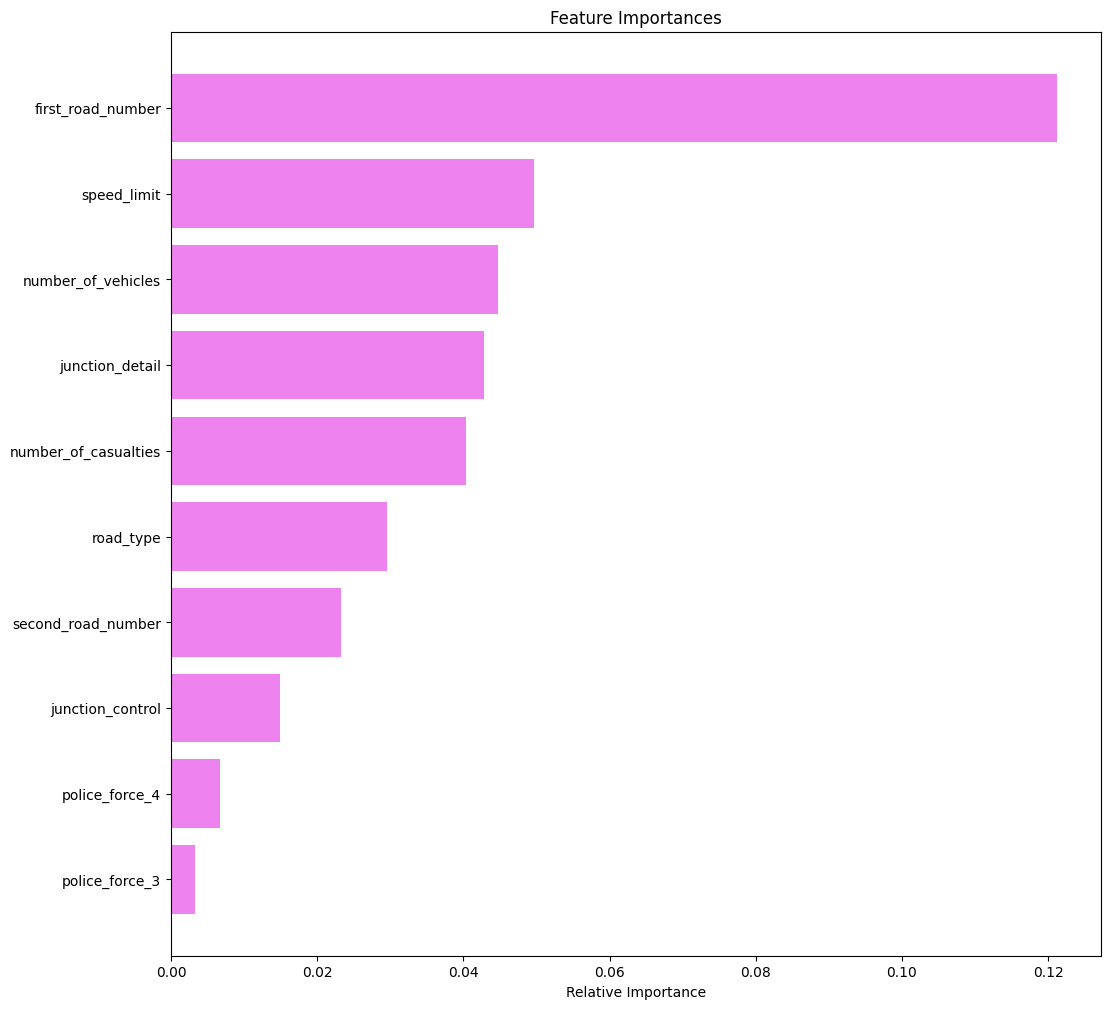

In [74]:
best_rf = models[2][1]
feature_names = X_train.columns
importances = best_rf.feature_importances_[:10]
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- we can also observe the top 10 features

### Summary/Conlusion

**EDA:**

We performed exploratory data analysis (EDA) on the accident severity dataset and found that there are 24 features in total, including factors such as the number of vehicles involved, the weather conditions, and whether a police officer attended the scene. We also observed that some features are categorical and others are numerical, and that there are some missing values in the dataset.

**Model Development: **

We then built three different machine learning models - logistic regression, decision tree, and random forest - to predict accident severity based on the features in the dataset. We trained these models on a training set and evaluated their performance on a validation set.

**Results:**

Our analysis showed that the decision tree and random forest models had very high accuracy scores on the training set, but lower scores on the validation set. This suggests that these models are overfitting the training data and may not generalize well to new data. The logistic regression model, on the other hand, had a lower accuracy score on the training set, but a similar score on the validation set, indicating that it may be a more robust model for predicting accident severity.

**Conclusion:**

Based on our analysis, we recommend using a logistic regression model to predict accident severity, as it appears to be more robust and less prone to overfitting. We also recommend further investigation into the most important features for predicting accident severity, as this information could be useful for developing targeted interventions to reduce the number and severity of accidents. Overall, our analysis demonstrates the potential of machine learning techniques for improving road safety and reducing the human and economic costs of accidents.



